# Tesla Data Analysis with Machine Learning
### Importing Essential Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv("/kaggle/input/tesla-stock-price-prediction-dataset/TESLA.csv",index_col=['Date'], parse_dates=['Date'])
df

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/tesla-stock-price-prediction-dataset/TESLA.csv'

In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

#### isolating the close column

In [ ]:
df_series = df['Close']
df_series

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

#### plotting the close data

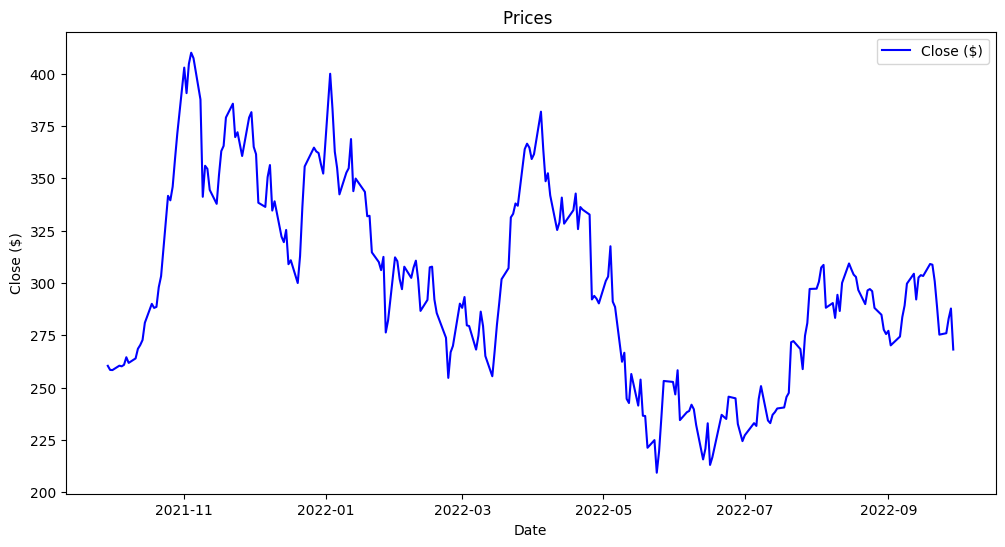

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_series.index, df_series, label='Close ($)', color='blue')
plt.title('Prices ')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [ ]:
mean_df_close =df_series.mean()
std_deviation = df_series.std()
print(mean_df_close)
print(std_deviation)

299.70910395652174
45.78828270953262


### Creating a 5 day Rolling Average

In [ ]:
rolling_mean = df_series.rolling(window=5).mean()

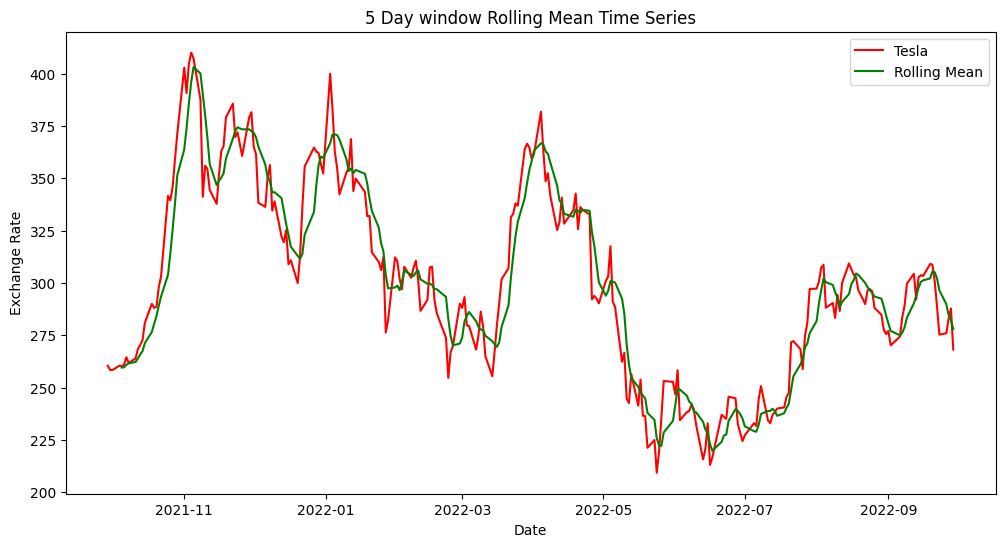

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_series.index, df_series, label='Tesla', color='red')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='green')
plt.title('5 Day window Rolling Mean Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Time Series with Keras 

In [ ]:
df_series1 = df[['Close']]
df_series1

,Close
Date,
2021-09-29,260.436676
2021-09-30,258.493347
2021-10-01,258.406677
2021-10-04,260.510010
2021-10-05,260.196655
...,...
2022-09-23,275.329987
2022-09-26,276.010010
2022-09-27,282.940002


### Correlation of variables

In [ ]:
df.corr(method='kendall')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.919592,0.906290,0.854230,0.854230,-0.074664
High,0.919592,1.000000,0.909524,0.905777,0.905777,-0.041660
Low,0.906290,0.909524,1.000000,0.913933,0.913933,-0.108291
Close,0.854230,0.905777,0.913933,1.000000,1.000000,-0.075571
Adj Close,0.854230,0.905777,0.913933,1.000000,1.000000,-0.075571
Volume,-0.074664,-0.041660,-0.108291,-0.075571,-0.075571,1.000000


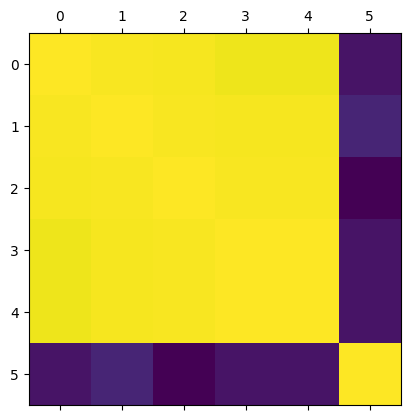

In [ ]:
# visualize correlation
plt.matshow(df.corr())
plt.show()

### import libraries for machine learning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

### Normalize the data

In [ ]:

scaler = MinMaxScaler()
df_series1= scaler.fit_transform(df_series1)

### Split the data into training and testing sets

In [ ]:
size_of_train = int(len(df_series1) * 0.80)
test_size = len(df_series1) - size_of_train
train_data, test_data = df_series1[0:size_of_train], df_series1[size_of_train:len(df_series1)]


### Create sequences for time series forecasting

In [ ]:

def sequence_Creation(df_series1, look_back):
    X, y = [], []
    for i in range(len(df_series1) - look_back):
        X.append(df_series1[i:(i+look_back), 0])
        y.append(df_series1[i + look_back, 0])
    return np.array(X), np.array(y)


## Declear number of iterations

In [ ]:
look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = sequence_Creation(train_data, look_back)
X_test, y_test = sequence_Creation(test_data, look_back)


### Create and compile the LSTM model

In [ ]:

model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


### Train the model

In [ ]:

model.fit(X_train, y_train, epochs=500, batch_size=32)


Epoch 1/500
6/6 [==============================] - 2s 14ms/step - loss: 0.2212
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1054
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0371
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0389
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0270
Epoch 6/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0284
Epoch 7/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0227
Epoch 8/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0220
Epoch 9/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0204
Epoch 10/500
6/6 [==============================] - 0s 15ms/step - loss: 0.0214
Epoch 11/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0196
Epoch 12/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0186
Epoch 13/500
6/6 [==============================]

### Make predictions

In [ ]:
# test model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


# Inverse transform the predictions to the original scale

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

## Root Mean Sqaured Error evaluation for traning and testing

In [ ]:
# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")

Train RMSE: 11.6470
Test RMSE: 9.0826


#### Graphing the Keras Model

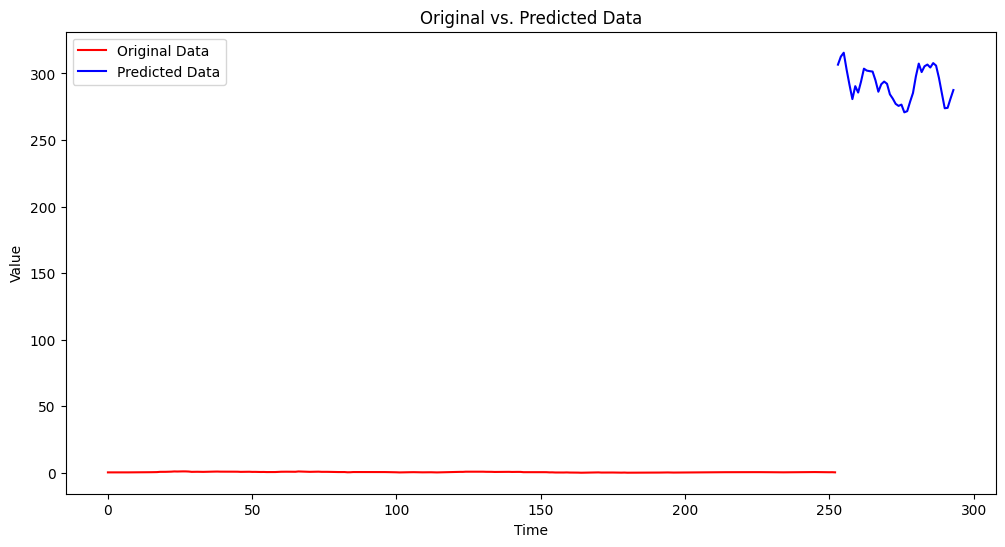

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(df_series1)), df_series1, label='Original Data', color='red')
plt.plot(np.arange(len(df_series1), len(df_series1) + len(test_predict)), test_predict, label='Predicted Data', color='blue')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### Predicting future prices 

In [ ]:
df_preds= df['Close']
df_preds

Date
2021-09-29    260.436676
2021-09-30    258.493347
2021-10-01    258.406677
2021-10-04    260.510010
2021-10-05    260.196655
                 ...    
2022-09-23    275.329987
2022-09-26    276.010010
2022-09-27    282.940002
2022-09-28    287.809998
2022-09-29    268.209991
Name: Close, Length: 253, dtype: float64

In [ ]:
log_returns_df = np.log(1+df_preds.pct_change())
log_returns_df.tail()

Date
2022-09-23   -0.047037
2022-09-26    0.002467
2022-09-27    0.024798
2022-09-28    0.017066
2022-09-29   -0.070530
Name: Close, dtype: float64

In [ ]:
u = log_returns_df.mean()
var = log_returns_df.var()
print(u)
print(var)

0.00011670824180026673
0.0016524670034425218


In [ ]:
stdev = log_returns_df.std()
stdev

0.04065054739413138

In [ ]:
drift = u -(0.5 * var) # u = average log return - half variance
drift

-0.0007095252599209941

In [ ]:
np.array(drift)

array(-0.00070953)

In [ ]:
norm.ppf(0.95)

1.6448536269514722

In [ ]:
x = np.random.rand(10,2) # to complete the second component aka volatility
x

array([[0.38899176, 0.76301555],
       [0.40820794, 0.78190686],
       [0.3206944 , 0.58177818],
       [0.27415257, 0.95672866],
       [0.96810355, 0.90353174],
       [0.88672298, 0.17289375],
       [0.8757725 , 0.10780907],
       [0.25894959, 0.82647935],
       [0.11954405, 0.11299801],
       [0.7793455 , 0.94769805]])

In [ ]:
norm.ppf(x)

array([[-0.28194781,  0.71603637],
       [-0.23215724,  0.77864937],
       [-0.46575789,  0.2064446 ],
       [-0.60030177,  1.71392402],
       [ 1.85362454,  1.30194111],
       [ 1.20928327, -0.94279162],
       [ 1.15411019, -1.23826414],
       [-0.64658714,  0.94034367],
       [-1.17726912, -1.21073749],
       [ 0.76998464,  1.6229322 ]])

In [ ]:
t_intervals = 365 # tintervals = time intervals. interested in forecast stock prices for next 1000 days
iterations = 5 # asking computer to produce 10 series of future stock price predicitons

In [ ]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.95738424, 0.97508089, 0.91789155, 0.93197243, 1.03622831],
       [1.031526  , 0.97442639, 0.94254303, 1.0753128 , 0.95957327],
       [1.02422416, 0.97008085, 1.06463988, 0.97996661, 1.0471373 ],
       ...,
       [0.96090787, 0.93724626, 0.93456952, 0.93369657, 1.01904444],
       [0.89282183, 0.96955306, 0.97761844, 1.01022787, 1.02747901],
       [0.98634195, 0.95610722, 1.00450048, 0.96797438, 0.93185206]])

In [ ]:
S0 = df_preds.iloc[-1]
S0

268.209991

In [ ]:
prices_list= np.zeros_like(daily_returns) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
prices_list[0] = S0 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list


array([[268.209991, 268.209991, 268.209991, 268.209991, 268.209991],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       ...,
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ,   0.      ]])

In [ ]:
for t  in range(1, t_intervals): # this loop starts at day 1 and ends of day 1000
  prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[268.209991  , 268.209991  , 268.209991  , 268.209991  ,
        268.209991  ],
       [276.66557835, 261.35089365, 252.79945801, 288.40963553,
        257.3671382 ],
       [283.3675709 , 253.53149632, 269.14038473, 282.63181178,
        269.49873013],
       ...,
       [288.65479741, 122.17487086, 112.70245194, 222.71034802,
        223.72583727],
       [257.71730362, 118.45502042, 110.17999487, 224.98820099,
        229.87360124],
       [254.19738813, 113.25570022, 110.67585724, 217.78281519,
        214.20819   ]])

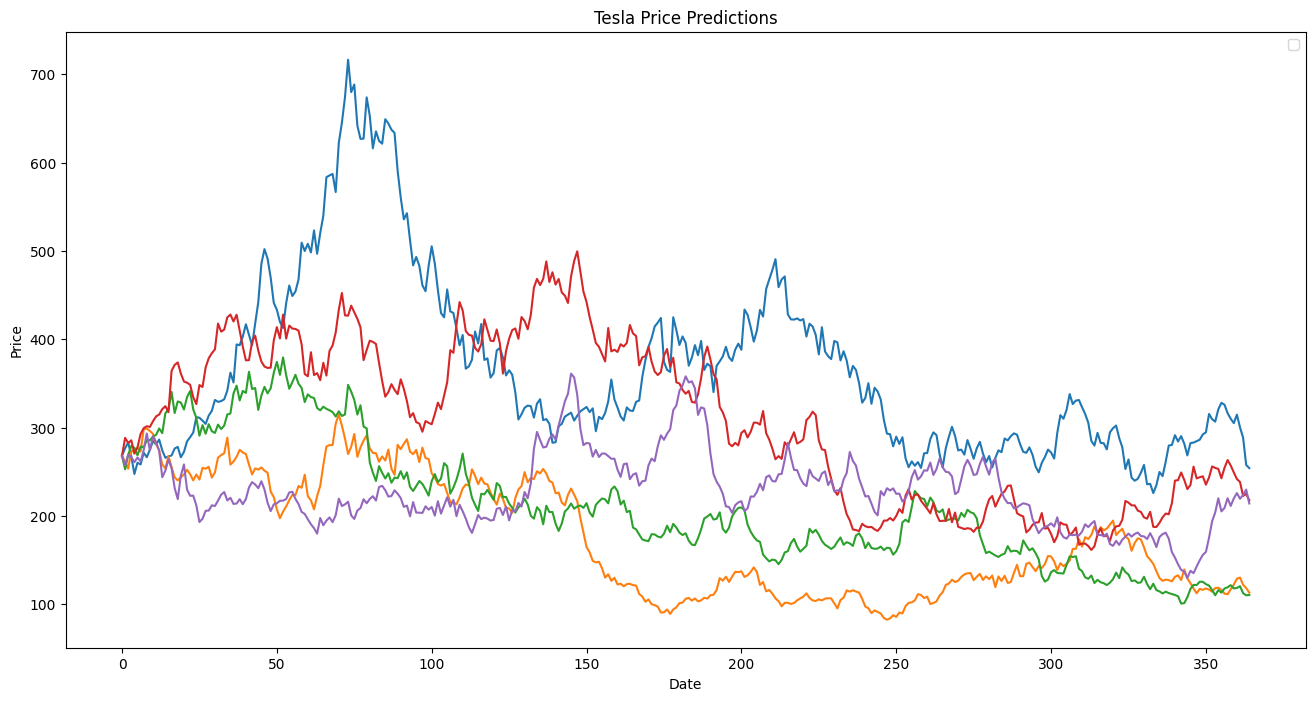

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(prices_list)
plt.title('Tesla Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()